# Projet ML: Estimation du coût d'un bien immobilier

# Itération 1

In [30]:
#Importation des bibliothèques utiles et chargement du jeu Sberbank
import pandas as pd
import numpy as np
# read the data
df = pd.read_csv('sberbank.csv')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


## Prétraitement des données

### Traitement des données manquantes

In [31]:
#code ici
#remplcer les valeurs null dans les colones non nummériques par la valeur la plus fréquente

df_categoric = df.select_dtypes(exclude='number')
categoric_cols = df_categoric.columns.values

for col in categoric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print(col)
        top = df[col].describe()['top'] # impute with the most frequent value.
        
        df[col] = df[col].fillna(top)
        


#remplcer les valeurs null dans les colones nummériques par la valeur la mediane
df_numeric = df.select_dtypes(include=[np.number])

numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        med = df[col].median()
        df[col] = df[col].fillna(med)

        df.head()

### Traitement des données aberrantes

7.0
9.0
16.0
(30471, 292)
30471
0


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,9,4,0,13,22,1,0,52,4,16.0
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,16.0
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,16.0
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,16.0
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16.0


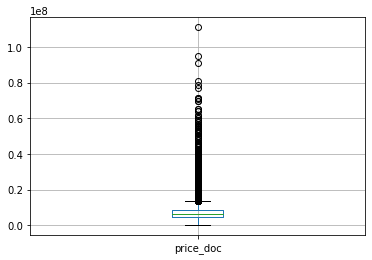

In [32]:
# decrire la méthodologie adoptée pour faire le traitement
#code ici
#Utilisation de la règle interquartile pour trouver des valeurs aberrantes
df.boxplot(column='price_doc')
Q1=df.max_floor.quantile(0.25)
Q3=df.max_floor.quantile(0.75)
Q=df.max_floor.describe()
IQR=Q3-Q1
print(IQR)
print(Q1)
print(Q3)
ind=df[(df['price_doc'] < Q1-1.5*IQR )].index
ind2=df[(df['price_doc'] > Q3+1.5*IQR )].index
#df3[ind,'max_floor']=Q1
#| (df3['price_doc'] > Q3+1.5*IQR  )].index| (df3['price_doc'] > Q3+1.5*IQR  )].index
print(df.shape)
print(len(ind2))
print(len(ind))
df.loc[ind,'price_doc']=Q1
df.loc[ind2,'price_doc']=Q3

df.head()

### Traitement du problème d'incohérence des données 

In [33]:
# decrire la méthodologie adoptée pour faire le traitement
#code ici
#supression des espaces blancs au debut
df["sub_area"] = df["sub_area"].str.lstrip()
df["sub_area"]
#supression des espaces blancs à la fin
df["sub_area"] = df["sub_area"].str.rstrip()
print(df["sub_area"])
#supression des espaces entre les mots

df['sub_area'] = df['sub_area'].str.replace(' ','')
print(df["sub_area"])

#formater les dates
df['timestamp'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d')

#supression des symboles monétaires
money_chars = ["$","€","¢","£","₿"]
for column in df.columns:
    df[column]= df[column].replace('money_chars','')
    
    df.head()

0                    Bibirevo
1           Nagatinskij Zaton
2              Tekstil'shhiki
3                      Mitino
4                   Basmannoe
                 ...         
30466                Otradnoe
30467                Tverskoe
30468    Poselenie Vnukovskoe
30469            Obruchevskoe
30470             Novogireevo
Name: sub_area, Length: 30471, dtype: object
0                   Bibirevo
1           NagatinskijZaton
2             Tekstil'shhiki
3                     Mitino
4                  Basmannoe
                ...         
30466               Otradnoe
30467               Tverskoe
30468    PoselenieVnukovskoe
30469           Obruchevskoe
30470            Novogireevo
Name: sub_area, Length: 30471, dtype: object


### Traitement du problème de redondances des données 

In [34]:
#code ici
##df2.drop('price_doc', axis=1).drop_duplicates()

# drop rows with a lot of missing values.
ind_missing = df[df['price_doc'] > 35].index
df = df.drop(ind_missing, axis=0)
print(df.shape)

df.head()

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,9,4,0,13,22,1,0,52,4,16.0
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,16.0
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,16.0
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,16.0
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16.0


### Transformation des données 

In [35]:
#code ici
DFCat=df[categoric_cols]
DFNum=df[numeric_cols]
DFCat.head()
print(DFCat.shape)
DFCat.head()
DFCat['culture_objects_top_25']=DFCat['culture_objects_top_25'].replace({"no":0,
 "yes":1})
DFCat.replace({"no":0,"yes":1},inplace=True)
from sklearn import preprocessing
DFCat=df[categoric_cols]
label_encoder = preprocessing.LabelEncoder()
DFCat['culture_objects_top_25']= label_encoder.fit_transform(DFCat['culture_objects_top_25'])


df = df.drop(columns='product_type')
df.head()

(30471, 16)


<ipython-input-35-e75cd936547d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFCat['culture_objects_top_25']=DFCat['culture_objects_top_25'].replace({"no":0,
C:\Users\harou\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-35-e75cd936547d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,9,4,0,13,22,1,0,52,4,16.0
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,16.0
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,16.0
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,16.0
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16.0


### Normalisation des données 

In [36]:
#code ici
from sklearn.model_selection import train_test_split
Data2=df[numeric_cols]
df_y=Data2[['price_doc']]
df_x=Data2.drop(columns=['price_doc'])

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 4 )

print(x_train.shape)
print(x_test.shape)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train) 
xtrainnorm=scaler.transform(x_train)           
xtestnorm=scaler.transform(x_test)           

print(xtrainnorm.mean())
print(xtrainnorm.std())

df.head()

(24376, 275)
(6095, 275)
-3.1417618951471447e-18
1.0000000000000004


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,9,4,0,13,22,1,0,52,4,16.0
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,...,15,3,0,15,29,1,10,66,14,16.0
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,...,10,3,0,11,27,0,4,67,10,16.0
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,...,11,2,1,4,4,0,0,26,3,16.0
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,...,319,108,17,135,236,2,91,195,14,16.0


## Entrainement et optimisation des paramètres d'un modèle 

In [37]:
#code ici
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
ytrain_trans = kbins.fit_transform(y_train)
ytest_trans = kbins.transform(y_test)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, ytrain_trans)

print(model.score(x_train, ytrain_trans)*100,'%')
print(model.score(x_test, ytest_trans)*100,'%')

C:\Users\harou\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:167: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
<ipython-input-37-5d1b964f0e77>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, ytrain_trans)


100.0 %
100.0 %


## Evaluation d'un modèle

In [38]:
#code ici
# Decision tree Classfication

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=20)
  
    # Performing training
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state = 10)
n_scores = cross_val_score(clf_gini, x_train, ytrain_trans, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


In [39]:
# KNN Classification
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
ytrain_trans = kbins.fit_transform(y_train)
ytest_trans = kbins.transform(y_test)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train, ytrain_trans)

print(model.score(x_train, ytrain_trans)*100,'%')
print(model.score(x_test, ytest_trans)*100,'%')

C:\Users\harou\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:167: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
<ipython-input-39-809f058a3155>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, ytrain_trans)


100.0 %
100.0 %
